In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
df=pd.read_csv('calories.csv')
df1=pd.read_csv('exercise.csv')

In [3]:
df.head(5)
df1.head(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [4]:
df2 = pd.merge(df, df1, on='User_ID', how='inner')


In [5]:
df2.head(5)

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [6]:
df2.shape

(15000, 9)

In [7]:
df2.isnull().sum()

User_ID       0
Calories      0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [8]:
df2.replace({'Gender':{'male':1,'female':0}},inplace=True)

In [9]:
df2.head(5)

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,1,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,0,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,1,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,0,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,0,27,154.0,58.0,10.0,81.0,39.8


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  int64  
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 1.1 MB


In [11]:
df2.describe()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,89.539533,0.496467,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,62.456978,0.500004,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,1.000000,0.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,35.000000,0.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,79.000000,0.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,138.000000,1.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,314.000000,1.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


In [12]:
sns.set()

C:\Users\singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

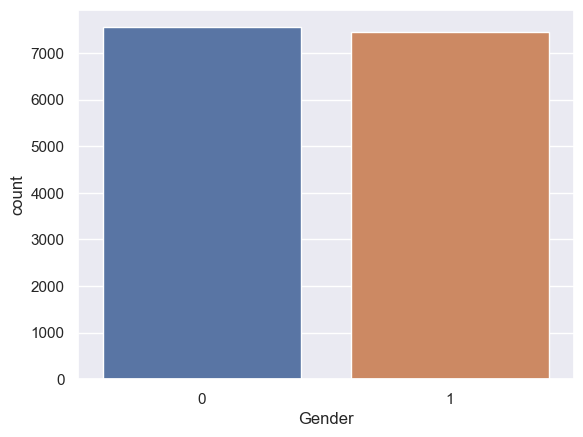

In [13]:
sns.countplot(df2['Gender'])

In [14]:
df2['Gender'].value_counts()

0    7553
1    7447
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Height', ylabel='Count'>

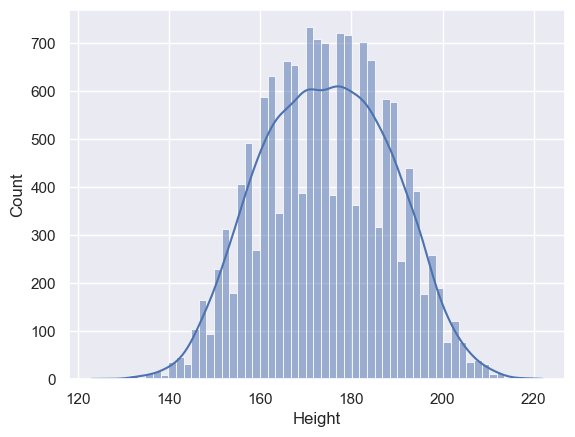

In [15]:
sns.histplot(df2['Height'],kde=True)

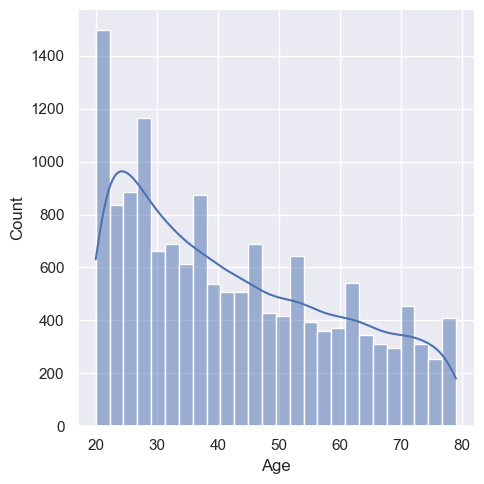

In [16]:
sns.displot(df2['Age'],kde=True)

In [17]:
correlation=df2.corr()

<AxesSubplot:>

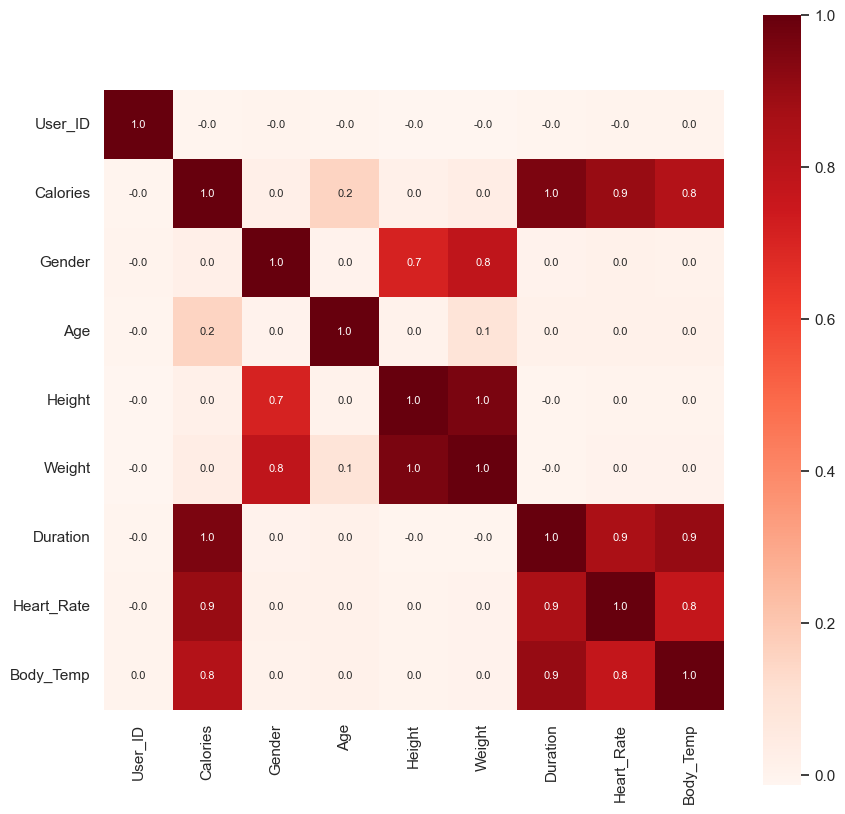

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True , annot_kws={'size':8},cmap='Reds')

In [19]:
x=df2.drop(columns=['User_ID','Calories'],axis=1)
y=df2.Calories

In [20]:
print(x)
print(y)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           1   68   190.0    94.0      29.0       105.0       40.8
1           0   20   166.0    60.0      14.0        94.0       40.3
2           1   69   179.0    79.0       5.0        88.0       38.7
3           0   34   179.0    71.0      13.0       100.0       40.5
4           0   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       0   20   193.0    86.0      11.0        92.0       40.4
14996       0   27   165.0    65.0       6.0        85.0       39.2
14997       0   43   159.0    58.0      16.0        90.0       40.1
14998       1   78   193.0    97.0       2.0        84.0       38.3
14999       1   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]
0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999   

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [22]:
print(x.shape,x_train.shape,x_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [23]:
model=XGBRegressor()

In [24]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [25]:
from sklearn.metrics import accuracy_score 

In [26]:
test_data_prediction=model.predict(x_test)

In [27]:
print(test_data_prediction)

[179.14981  100.68549   58.298172 ...  60.724884  21.978842  99.608894]


In [28]:
mae=metrics.mean_absolute_error(y_test,test_data_prediction)

In [29]:
print(mae)

1.4796614986062049


In [30]:
import gradio as gr

In [31]:


def predict_calories(Gender, Age, Height, Weight, Duration, Heart_Rate, Body_Temp):
    # Assuming Gender is passed as a string ("Male" or "Female"), convert it to a numeric value if needed
    # This depends on how your model was trained
    gender_map = {"Male": 0, "Female": 1}  # Adjust as per your training data
    Gender = gender_map.get(Gender, Gender)
    
    input_data = np.array([Gender, Age, Height, Weight, Duration, Heart_Rate, Body_Temp]).reshape(1, -1)
    prediction = model.predict(input_data)
    return prediction[0]

# Define Gradio interface
iface = gr.Interface(
    fn=predict_calories, 
    inputs=[
        gr.inputs.Radio(["Male", "Female"], label="Gender"),
        gr.inputs.Slider(0, 100, label="Age"),
        gr.inputs.Slider(100, 250, label="Height (cm)"),
        gr.inputs.Slider(30, 200, label="Weight (kg)"),
        gr.inputs.Slider(1, 120, label="Duration (mins)"),
        gr.inputs.Slider(40, 200, label="Heart Rate"),
        gr.inputs.Slider(35, 42, step=0.1, label="Body Temp (°C)")
    ],
    outputs=gr.outputs.Textbox(label="Predicted Calories"),
)

iface.launch()



C:\Users\singh\AppData\Local\Temp\ipykernel_15636\741780815.py:15: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  gr.inputs.Radio(["Male", "Female"], label="Gender"),
C:\Users\singh\AppData\Local\Temp\ipykernel_15636\741780815.py:15: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  gr.inputs.Radio(["Male", "Female"], label="Gender"),
C:\Users\singh\AppData\Local\Temp\ipykernel_15636\741780815.py:16: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  gr.inputs.Slider(0, 100, label="Age"),
C:\Users\singh\AppData\Local\Temp\ipykernel_15636\741780815.py:16: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  gr.inputs.Slider(0, 100, label="Age"),
C:\Users\singh\AppData\Local\Temp\ipykernel_15636\741780815.

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
